In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

sys.path.insert(1, os.path.join(sys.path[0], "code/implementation"))
from layer_v2 import Layer
from neural_network_v2 import NeuralNetwork

In [2]:
rings_train = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/rings3-regular-training.csv"
)
rings_test = pd.read_csv("https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/rings3-regular-test.csv")

In [3]:
rings_train

,x,y,c
0,-93.563317,-76.345110,0
1,1.060114,-16.727040,0
2,24.396099,40.358822,0
3,-94.595137,-97.889250,0
4,-85.331382,-56.736933,0
...,...,...,...
1495,-3.227585,-69.846357,2
1496,-82.598085,-51.758017,2
1497,-46.601078,-21.654871,2
1498,-59.106450,-44.528442,2


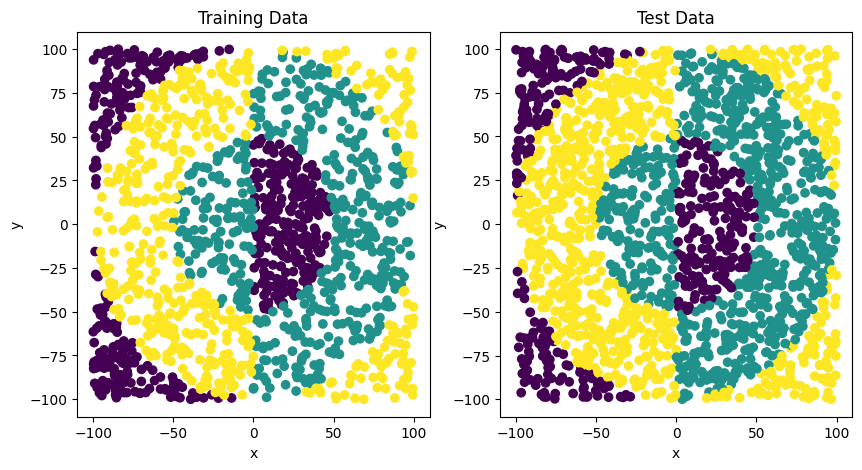

In [4]:
# visualizing the data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(rings_train["x"], rings_train["y"], c=rings_train["c"], cmap="viridis")
plt.title("Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
plt.scatter(rings_test["x"], rings_test["y"], c=rings_test["c"], cmap="viridis")
plt.title("Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
x = rings_train[["x", "y"]].to_numpy()
y = rings_train["c"].to_numpy().reshape(-1, 1)
# one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(y)
y = encoder.transform(y)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [6]:
neural = NeuralNetwork(cost_function="cross_entropy_with_softmax")
neural.add_layer(Layer(2, 10, "relu"))
neural.add_layer(Layer(10, 3, "softmax"))

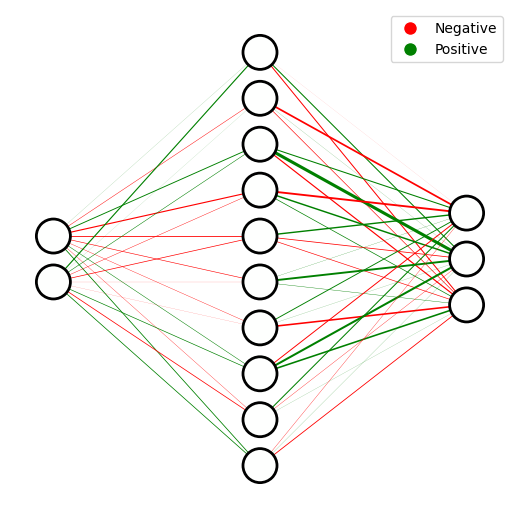

In [9]:
neural.visualize_network()

In [8]:
y_hat = neural.predict(x)
y_hat

array([[1.02743019e-47, 1.00000000e+00, 3.48492010e-57],
       [9.99940241e-01, 4.56229108e-05, 1.41359891e-05],
       [4.52794173e-64, 1.00000000e+00, 1.05122680e-79],
       ...,
       [2.35908552e-28, 1.00000000e+00, 4.69229889e-28],
       [2.29824946e-31, 1.00000000e+00, 3.25826287e-36],
       [2.61728914e-25, 1.00000000e+00, 7.37033790e-28]])